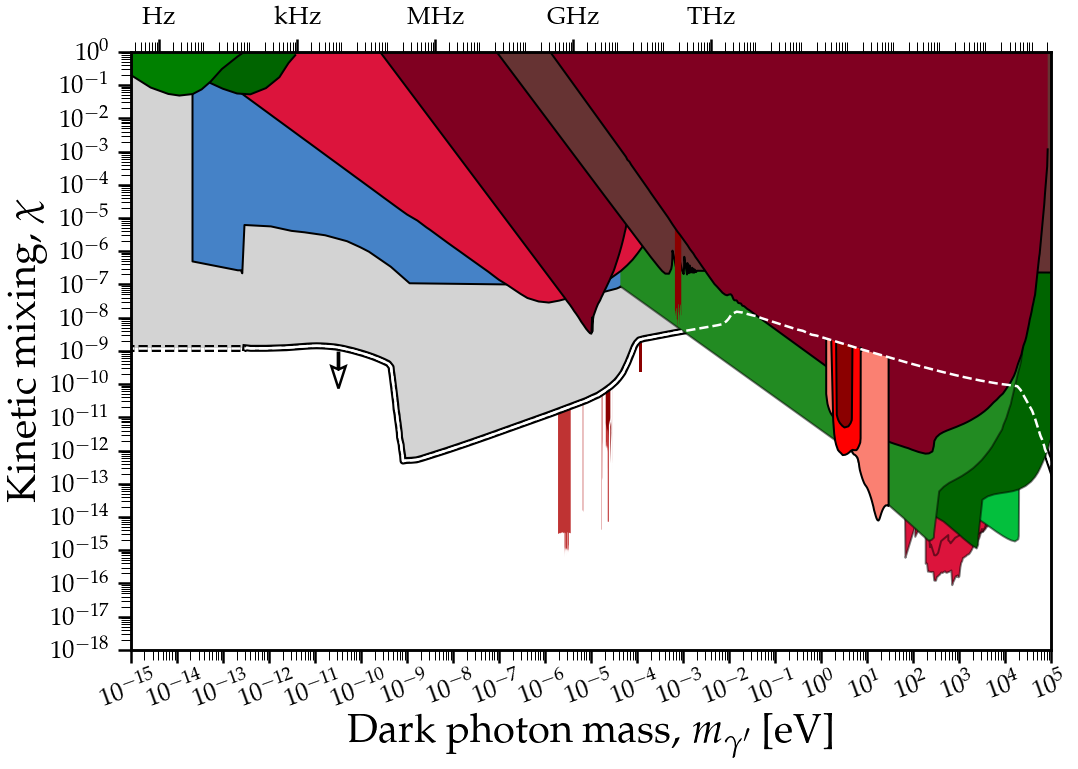

In [271]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
from PlotFuncs import col_alpha,CurvedText
from PlotFuncs import BlackHoleSpins, AxionNeutron, MySaveFig
%matplotlib inline



def FigSetup(xlab=r'Dark photon mass, $m_{\gamma^\prime}$ [eV]',ylab='Kinetic mixing, $\chi$',\
                 g_min = 1.0e-18,g_max = 1.0e0,\
                 m_min = 1.0e-15,m_max = 1e5,\
                 lw=2.5,lfs=40,tfs=25,tickdir='out',\
                 Grid=False,Shape='Rectangular',mathpazo=True,
                 TopAndRightTicks=False,FrequencyAxis=True,UnitAxis=True):

        plt.rcParams['axes.linewidth'] = lw
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif',size=tfs)

        if mathpazo:
            mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

        if Shape=='Wide':
            fig = plt.figure(figsize=(16.5,5))
        elif Shape=='Rectangular':
            fig = plt.figure(figsize=(16.5,11))

        ax = fig.add_subplot(111)

        ax.set_xlabel(xlab,fontsize=lfs)
        ax.set_ylabel(ylab,fontsize=lfs)

        ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
        ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([m_min,m_max])
        ax.set_ylim([g_min,g_max])

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.xaxis.set_major_locator(locmaj)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if Shape=='Rectangular':
            plt.xticks(rotation=20)

        if Grid:
            ax.grid(zorder=0)

        if FrequencyAxis:
            ax2 = ax.twiny()
            ax2.set_xlim([m_min*241.8*1e12,m_max*241.8*1e12])
            

            
            ax2.set_xscale('log')
            ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=7)
            ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax2.xaxis.set_major_locator(locmaj)
            ax2.xaxis.set_minor_locator(locmin)
            ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
            
            ax2.set_xticks([1e0,1e3,1e6,1e9,1e12])
            ax2.set_xticklabels(['Hz','kHz','MHz','GHz','THz'])
            
            plt.sca(ax)



        return fig,ax
    
    
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

    
def DarkMatter(ax,col=[0.75, 0.2, 0.2],fs=20,projection=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    dat = loadtxt("limit_data/DarkPhoton/DM.txt")
    plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=zo,lw=2.5,path_effects=pek)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)
    
    plt.plot([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],'--',color='w',alpha=1,zorder=zo,lw=2.5,path_effects=pek)
    plt.fill_between([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)

    plt.plot(dat[:,0],dat[:,1],'--',color='w',alpha=1,zorder=100,lw=2.5)

    return
    
    
def Haloscopes(ax,col=[0.75, 0.2, 0.2],fs=20,projection=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
#     dat = loadtxt("limit_data/AxionPhoton/RBF_UF_Haloscopes.txt")
#     dat[:,1] = sqrt((dat[:,1]))/sqrt(0.0025)
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=zo,alpha=1.0)
    
    costh = sqrt(1/3)
    
    
    B = 7.6/1.444e-3 # eV^2
    dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/CAPP-8TB.txt")
    B = 8/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ORGAN.txt")
    B = 14/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
    B = 8.1/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    return
    
    
def StellarBounds(ax,fs=30,text_on=False):
    y2 = ax.get_ylim()[1]
    # Stellar physics constraints

    # Globular clusters 
    HB_col = [0.01, 0.75, 0.24]
    HB = loadtxt("limit_data/DarkPhoton/RG.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.9,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.9)

    
    # Globular clusters 
    HB_col = 'DarkGreen'
    HB = loadtxt("limit_data/DarkPhoton/HB.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.95,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.95)

    # Solar bound
    Solar_col = 'ForestGreen'
    Solar = loadtxt("limit_data/DarkPhoton/Solar.txt")
    plt.plot(Solar[:,0],Solar[:,1],color='k',alpha=0.5,zorder=1,lw=2)
    plt.fill_between(Solar[:,0],Solar[:,1],y2=y2,edgecolor=None,facecolor=Solar_col,zorder=1)

    
    
#     # SN1987A-neutrinos updated arXiv:[1808.10136]
#     SN = loadtxt("limit_data/AxionPhoton/SN1987A_2019.txt")
#     plt.fill_between(SN[:,0],SN[:,1],y2=y2,edgecolor=None,facecolor='ForestGreen',zorder=0.1)
#     # SN1987A-decay arXiv:[1702.02964]
#     SN = loadtxt("limit_data/AxionPhoton/SN1987A_decay.txt")
#     plt.fill_between(SN[:,0],SN[:,1],y2=y2,edgecolor=None,facecolor='ForestGreen',zorder=0.1)

    if text_on:
        plt.text(0.4e6,6e-7,r'{\bf SN1987A}',fontsize=fs-9,color='w',rotation=-60,ha='left',va='top')
        plt.text(1e1,3e-9,r'{\bf Solar} $\nu$',fontsize=fs+3,color='w')
        plt.text(1.4e0,1.5e-10,r'{\bf Horizontal branch}',fontsize=fs-7,color='w')
        return

    
def Xenon(ax,col='crimson',fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Xenon1T.txt")
    plt.plot(1e3*dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(1e3*dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    dat = loadtxt("limit_data/DarkPhoton/Xenon100.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    
    return

def DAMIC(ax,col='salmon',fs=30):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]
    dat[-1,1] = y2[-1]
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.2)
    
    return


def FUNK(ax,col='red',fs=30):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/FUNK.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    
    return


def Tokyo(ax,col='darkred',fs=30):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Dish.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.4,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.4)
    
    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Knirck.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=1e0,edgecolor=None,facecolor=col,zorder=1.1)
    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Tomita.txt")
    plt.plot([dat[1,0],dat[1,0]],[dat[1,1],1e0],'-',color=col,lw=3,zorder=0.2)
    return
    
    

def Coulomb(ax,col='crimson',fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Coulomb.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.07,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.07)
    return

def CROWS(ax,col=[0.5, 0.0, 0.13],fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CROWS.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.08,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.08)
    return

def LSW(ax,col=[0.4, 0.2, 0.2],fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LSW.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.09)
    return

def CMB(ax,col=[0.27, 0.51, 0.78],fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CMB.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    return


def Jupiter(ax,col='Green',fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=2)
    return

def Earth(ax,col='DarkGreen',fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Earth.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.9,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.9)
    return

def CAST(ax,col=[0.5, 0.0, 0.13],fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CAST.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.1)
    return


def SHUKET(ax,col='darkred',fs=30):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    return

fig,ax = FigSetup()

DarkMatter(ax)
Haloscopes(ax)
StellarBounds(ax)
Xenon(ax)
DAMIC(ax)
FUNK(ax)
Tokyo(ax)
SHUKET(ax)
Coulomb(ax)
CROWS(ax)
CMB(ax)
LSW(ax)
CAST(ax)
Jupiter(ax)
Earth(ax)

plt.arrow(0.3, 0.5, 0, -0.045, transform=fig.transFigure,figure=fig,
      length_includes_head=True,lw=2.5,
      head_width=0.012, head_length=0.028, overhang=0.13,
      edgecolor='k',facecolor='w',clip_on=False)

MySaveFig(fig,'DarkPhoton')

In [272]:
\begin{marginnote}[]
\entry{Term A}{definition}
\entry{Term B}{definition}
\entry{Term C}{defintion}
\end{marginnote}


SyntaxError: unexpected character after line continuation character (<ipython-input-272-271b08eb30e5>, line 1)